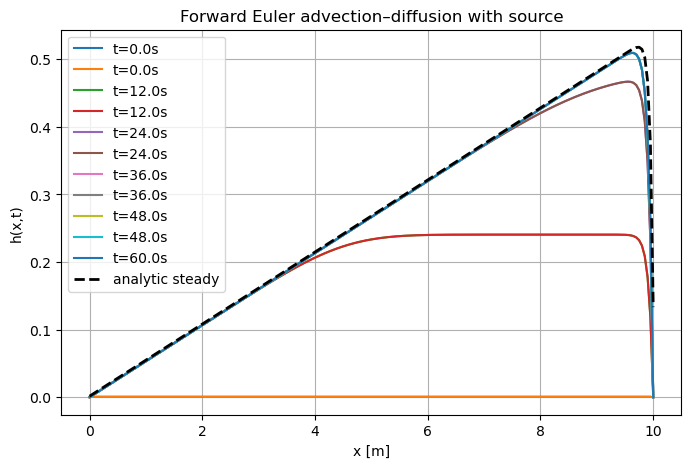

In [6]:
import numpy as np
import matplotlib.pyplot as plt


L= 10.0 # 10m convyer belt, longest possible
v= 0.375 # advection velocity, mid point of suggested speeds
D= 0.02 # diffusion coefficient, small spreading of sand
s0= 0.02 # source term, cont. rate of sand being added
Nx = 201 # number of grid points 
x = np.linspace(0, L, Nx)
dx = x[1] - x[0] # grid spacing for finite differences


dt_max = 1.0 / (abs(v)/dx + 2*D/dx**2) # calculating max stable time step

Tmax = 60.0 # total simulation time
Nt = int(Tmax / dt) # noumber of step to reach the max simluation time

# Initial height is 0 everywhere, therefore IC:
h = np.zeros_like(x)

snapshots = [] # initialising vectors to add data in for plots
times = []

# create empty arrays fro 1st and 2nd derivatives 
for n in range(Nt):
    dhdx = np.zeros_like(h)
    d2hdx2 = np.zeros_like(h)

    # advection addition to numerics given in workshop
    # taking right as positive adn left as negative, is v is greater than 0 take the value from the left (ie one before) and then opposite if the conyer belt is moving the opposite way
    if v >= 0:
        dhdx[1:] = (h[1:] - h[:-1]) / dx
        dhdx[0] = dhdx[1]
    else:
        dhdx[:-1] = (h[1:] - h[:-1]) / dx
        dhdx[-1] = dhdx[-2]
    
    # Central difference for diffusion from workshop
    d2hdx2[1:-1] = (h[2:] - 2*h[1:-1] + h[:-2]) / dx**2
    
    # Forward Euler update from workshop
    # but with addition advection at each step as well as diffusion and s0
    h_new = h + dt * (-v * dhdx + D * d2hdx2 + s0)
    
    # Applying Dirichlet BC with fixed height 0 at both ends of belt
    h_new[0]  = 0.0
    h_new[-1] = 0.0

    h = h_new # replace old h with new h as steps move forward

    
    #saving snapshots in tiem to plot on grapgh later
    if n % max(1, Nt//5) == 0 or n == Nt-1:
        snapshots.append(h.copy())
        times.append((n+1)*dt)
        
    # Update
    h = h_new.copy()
    
    if n % (Nt // 5) == 0:
        snapshots.append(h.copy())
        times.append(n * dt)

# Analytic steady state for comparison
lam = v / D
C1 = D*s0/u**2
C2 = - (C1 + (s0/u)*L) / np.exp(lam*L)
h_analytic = C1 + C2*np.exp(lam*x) + (s0/v)*x

plt.figure(figsize=(8,5))
for i, hs in enumerate(snapshots):
    plt.plot(x, hs, label=f"t={times[i]:.1f}s")
plt.plot(x, h_analytic, 'k--', lw=2, label='analytic steady')
plt.xlabel("x [m]")
plt.ylabel("h(x,t)")
plt.title("Forward Euler advection–diffusion with source")
plt.legend()
plt.grid(True)
plt.show()